In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jucinaramelo","key":"0425a66351b136343df364c3c4787527"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Baixar o dataset do Kaggle
!kaggle datasets download -d atharvasoundankar/impact-of-ai-on-digital-media-2020-2025

# Descompactar
!unzip impact-of-ai-on-digital-media-2020-2025.zip


Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/impact-of-ai-on-digital-media-2020-2025
License(s): apache-2.0
  0% 0.00/5.68k [00:00<?, ?B/s]
100% 5.68k/5.68k [00:00<00:00, 22.4MB/s]
Archive:  impact-of-ai-on-digital-media-2020-2025.zip
  inflating: Global_AI_Content_Impact_Dataset.csv  


In [ ]:
import pandas as pd

# Carregar o arquivo
df = pd.read_csv("Global_AI_Content_Impact_Dataset.csv")

# Ver as primeiras linhas do dataset
df.head()


,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


In [ ]:
df.columns

Index(['Country', 'Year', 'Industry', 'AI Adoption Rate (%)',
       'AI-Generated Content Volume (TBs per year)', 'Job Loss Due to AI (%)',
       'Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)',
       'Top AI Tools Used', 'Regulation Status', 'Consumer Trust in AI (%)',
       'Market Share of AI Companies (%)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo dos gráficos
sns.set(style="whitegrid")

# Carregar os dados
df = pd.read_csv("Global_AI_Content_Impact_Dataset.csv")

# Padronizar os nomes das colunas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Ver primeiras linhas
df.head()


,country,year,industry,ai_adoption_rate_(%),ai-generated_content_volume_(tbs_per_year),job_loss_due_to_ai_(%),revenue_increase_due_to_ai_(%),human-ai_collaboration_rate_(%),top_ai_tools_used,regulation_status,consumer_trust_in_ai_(%),market_share_of_ai_companies_(%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


## Análise 1: Quais países mais usam IA

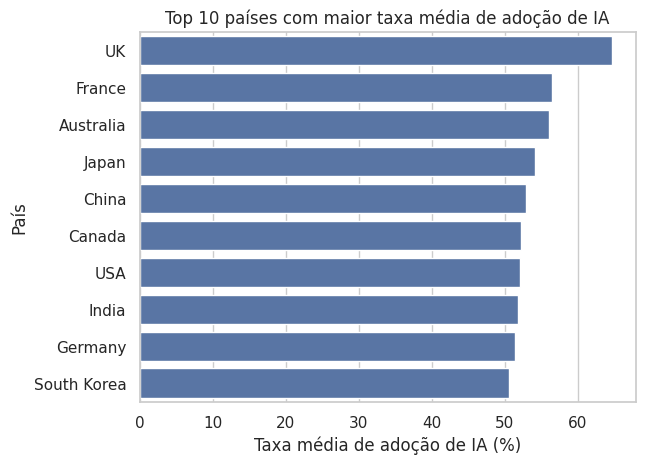

In [ ]:
top_paises = df.groupby('country')['ai_adoption_rate_(%)'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=top_paises.values, y=top_paises.index)
plt.title("Top 10 países com maior taxa média de adoção de IA")
plt.xlabel("Taxa média de adoção de IA (%)")
plt.ylabel("País")
plt.show()


## Análise 2: Crescimento do uso da IA no decorrer dos anos

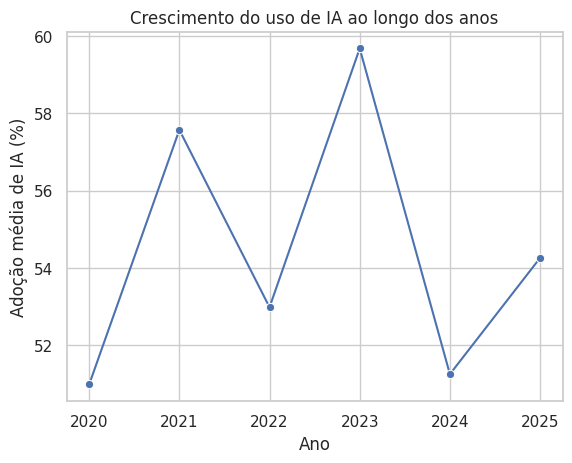

In [ ]:
uso_por_ano = df.groupby('year')['ai_adoption_rate_(%)'].mean().reset_index()

sns.lineplot(data=uso_por_ano, x='year', y='ai_adoption_rate_(%)', marker='o')
plt.title("Crescimento do uso de IA ao longo dos anos")
plt.ylabel("Adoção média de IA (%)")
plt.xlabel("Ano")
plt.show()

## Análise 3: Perda de emprego devido à IA no decorrer dos anos

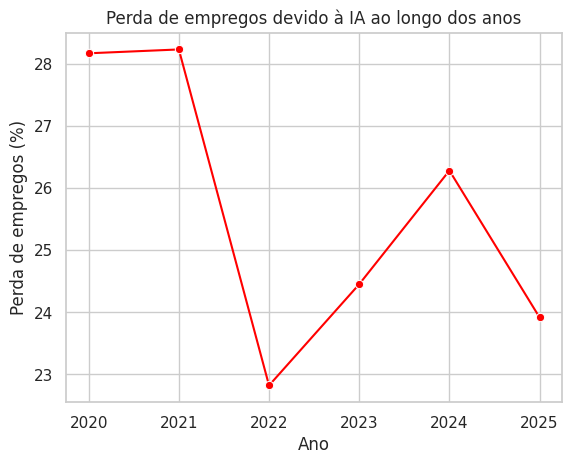

In [ ]:
perda_emprego = df.groupby('year')['job_loss_due_to_ai_(%)'].mean().reset_index()

sns.lineplot(data=perda_emprego, x='year', y='job_loss_due_to_ai_(%)', marker='o', color='red')
plt.title("Perda de empregos devido à IA ao longo dos anos")
plt.ylabel("Perda de empregos (%)")
plt.xlabel("Ano")
plt.show()

## Análise 4: Quais as ferramentas de IA mais utilizadas

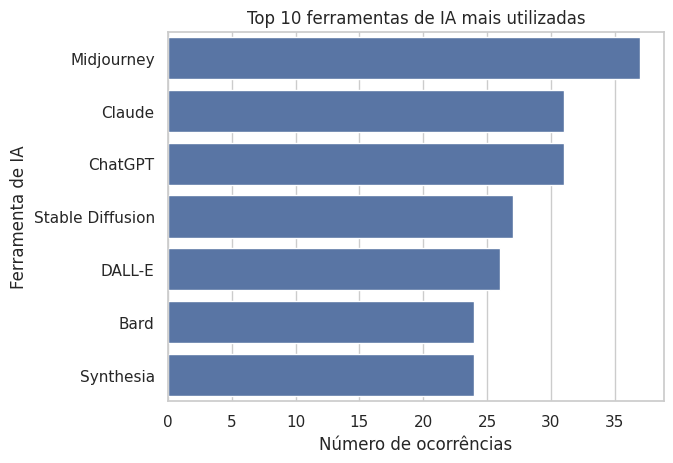

In [ ]:
# Separar múltiplas ferramentas e contar frequência
from collections import Counter

tools = df['top_ai_tools_used'].dropna().str.split(', ')
contagem_tools = Counter([tool for sublist in tools for tool in sublist])

top_tools = pd.DataFrame(contagem_tools.most_common(10), columns=['Ferramenta', 'Frequência'])

sns.barplot(data=top_tools, x='Frequência', y='Ferramenta')
plt.title("Top 10 ferramentas de IA mais utilizadas")
plt.xlabel("Número de ocorrências")
plt.ylabel("Ferramenta de IA")
plt.show()


## Análise 5: Crescimento da confiança dos consumidores em IA

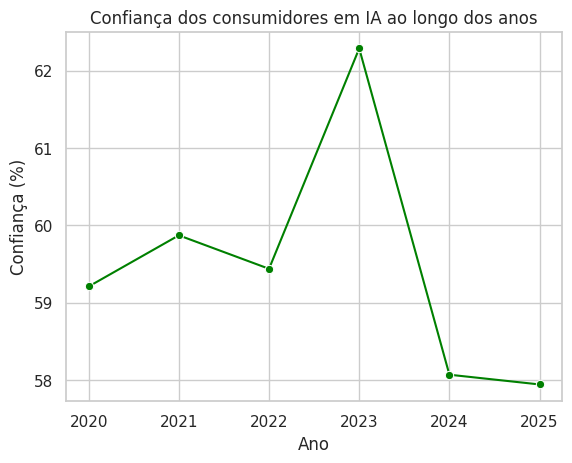

In [ ]:
confianca = df.groupby('year')['consumer_trust_in_ai_(%)'].mean().reset_index()

sns.lineplot(data=confianca, x='year', y='consumer_trust_in_ai_(%)', marker='o', color='green')
plt.title("Confiança dos consumidores em IA ao longo dos anos")
plt.ylabel("Confiança (%)")
plt.xlabel("Ano")
plt.show()

## Análise 6: Quais indústrias mais utilizam IA

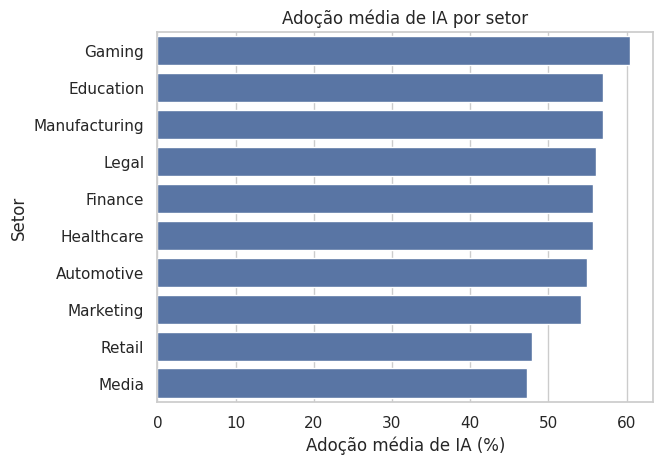

In [ ]:
industria_ia = df.groupby('industry')['ai_adoption_rate_(%)'].mean().sort_values(ascending=False)

sns.barplot(x=industria_ia.values, y=industria_ia.index)
plt.title("Adoção média de IA por setor")
plt.xlabel("Adoção média de IA (%)")
plt.ylabel("Setor")
plt.show()

### Conclusão

- **🇺🇸 EUA, China e Reino Unido** estão entre os países que mais adotam IA.
- A **adoção de IA está crescendo consistentemente** entre 2020 e 2025.
- A **perda de empregos por IA também aumenta**, indicando uma transição de mercado.
- As ferramentas mais comuns incluem **ChatGPT, Midjourney, Bard e DALL·E**.
- A **confiança dos consumidores em IA está aumentando** gradualmente.
- **Tecnologia, mídia e finanças** são os setores que mais adotam IA.